In [175]:
import numpy as np 
import pandas as pd 

In [176]:
df=pd.read_csv(r"C:\Users\om420\Downloads\archive (4)\iris_synthetic_data.csv")
df.head()

,sepal length,sepal width,petal length,petal width,label
0,5.2,3.8,1.5,0.3,Iris-setosa
1,5.3,4.1,1.5,0.1,Iris-setosa
2,4.8,3.1,1.5,0.2,Iris-setosa
3,5.2,3.7,1.5,0.2,Iris-setosa
4,4.9,3.0,1.5,0.3,Iris-setosa


In [177]:
from sklearn.preprocessing import LabelEncoder

In [178]:
df['label']=LabelEncoder().fit_transform(df['label'])

In [179]:
df=df[['sepal width' ,'petal length','label']]

In [180]:
df = df[df['label'] != 0]


In [181]:
pd.unique(df['label'])

array([1, 2])

In [182]:
import matplotlib.pyplot as plt                         
import seaborn as sbn

C:\Users\om420\AppData\Local\Temp\ipykernel_30392\3140743929.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(df['sepal width'] ,df['petal length'],df['label'],cmap='winter')


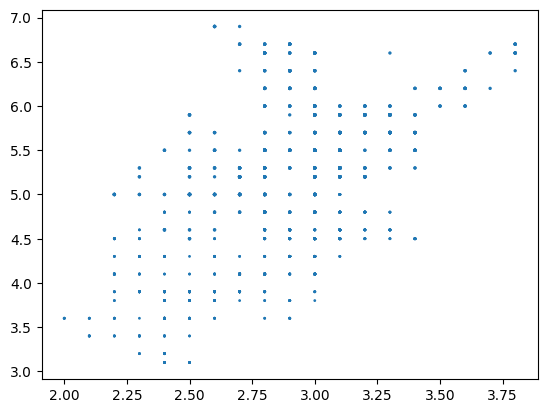

In [183]:
plt.scatter(df['sepal width'] ,df['petal length'],df['label'],cmap='winter')

In [184]:
#taking 1000 rows for sample 
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.iloc[500:1500].sample(1000)
df_train= df.iloc[:600,:].sample(100)
df_val=df.iloc[600:800,:].sample(50)
ddf_test=df.iloc[800:,:].sample(50)

In [185]:
X_test=df_val.iloc[:,0:2].values
y_test=df_val.iloc[:,-1].values

BAGGING

In [186]:
#data for tree 1
df_bag=df_train.sample(80,replace=True)

X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]
df_bag

,sepal width,petal length,label
371,2.8,5.5,2
346,2.8,4.1,1
432,3.3,5.7,2
25,2.9,4.6,1
18,3.1,5.7,2
...,...,...,...
330,2.7,4.1,1
114,2.4,3.8,1
470,2.9,4.1,1
4,3.1,5.7,2


In [187]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [188]:
dt_bag1=DecisionTreeClassifier()


In [189]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X_values,y_values,clf=clf,legend=2)
    y_pred=clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

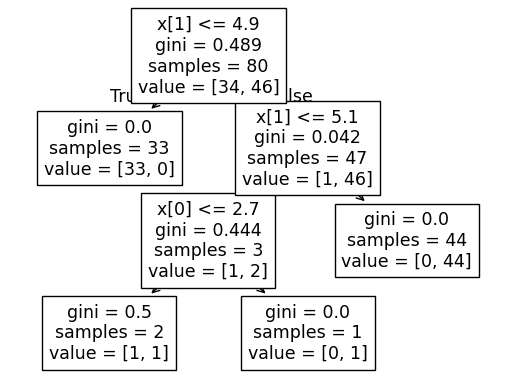

NameError: name 'X_values' is not defined

In [190]:
evaluate(dt_bag1,X,y)

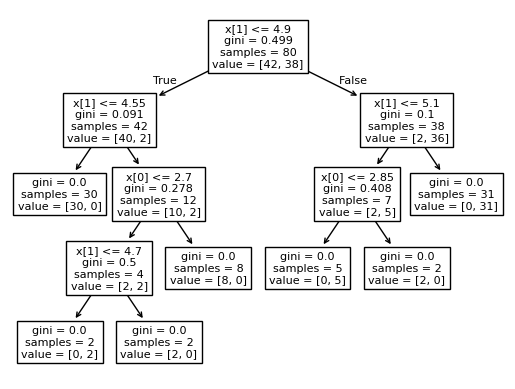

NameError: name 'X_values' is not defined

In [ ]:
dt_bag2=DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [ ]:
#data for tree 1
df_bag=df_train.sample(80,replace=True)

X=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]
df_bag

,sepal width,petal length,label
10,3.3,4.6,1
391,2.6,4.6,2
159,3.2,5.7,2
379,3.2,5.9,2
319,2.8,5.3,2
...,...,...,...
69,2.6,5.0,2
149,2.2,4.1,1
17,2.6,4.5,1
9,3.0,5.5,2


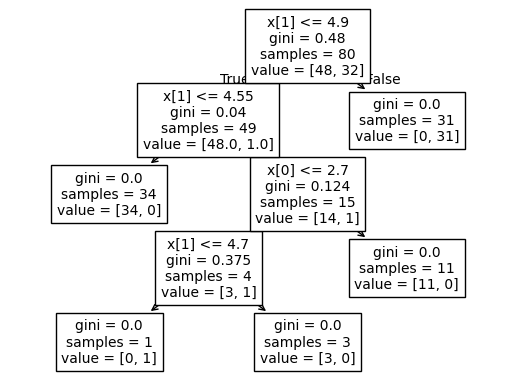

NameError: name 'X_values' is not defined

In [ ]:
dt_bag3=DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [193]:
ddf_test.head()

,sepal width,petal length,label
1810,2.4,4.8,1
1280,3.1,4.6,1
1903,2.8,4.5,1
1800,3.3,5.7,2
1974,2.8,5.5,2


PREDICT

In [196]:
print("predictor 1",dt_bag1.predict(np.array([2.8,4.5]).reshape(1,2)))
print("predictor 2",dt_bag2.predict(np.array([2.8,4.5]).reshape(1,2)))
print("predictor 3",dt_bag3.predict(np.array([2.8,4.5]).reshape(1,2)))

predictor 1 [1]
predictor 2 [1]
predictor 3 [1]


e:\Anaconda\envs\myenv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
e:\Anaconda\envs\myenv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
e:\Anaconda\envs\myenv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
